In [1]:
import numpy as np
import pandas as pd

In [2]:
m2 = pd.read_csv('merged_data.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
m2.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
1,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
2,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,2,0.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
4,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 20대 남성

In [4]:
M_20 = m2.loc[(m2['GENDER_M']==1) & (m2['CLNT_AGE']==20)]
M_20.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.00,38000.0,1.0,46.50,417.0,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
26,296.25,62030.0,1.0,293.75,1522.5,20,0,1,2,0.0,...,0,1,0,3.0,0.0,0,0,0.0,0.0,0.0
74,74.00,99500.0,1.0,59.00,2250.0,20,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
91,50.50,37000.0,2.0,52.00,507.5,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,2.0
154,35.00,29260.0,1.0,34.00,587.0,20,0,1,2,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0


In [124]:
#대대분류 삭제
M_20_drop = M_20.drop(M_20.loc[:, M_20.columns.str.startswith('CLAC0')], axis = 1)
M_20_drop.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'weekend',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9'],
      dtype='object')

In [125]:
mms = MinMaxScaler()
mms.fit(M_20_drop) #대대분류 뺀 column들만 갖고
M_20_transformed = mms.transform(M_20_drop)

In [66]:
Sum_of_squared_distances = []

for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(M_20_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


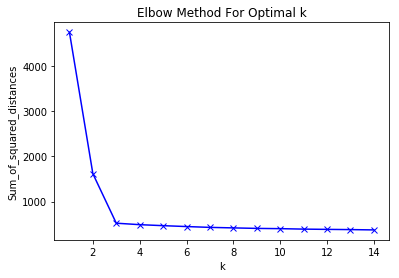

In [67]:
plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [126]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(M_20_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [128]:
M_20_transformed = pd.DataFrame(M_20_transformed)
M_20_transformed.columns = m2.columns[:34]
M_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.112705,0.002329,0.000000,0.091365,0.035825,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.0,0.013699,0.0,0.000000,0.0,0.086957,0.000000,0.000000,0.000000
1,0.602971,0.003806,0.000000,0.587851,0.131259,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.121212
2,0.147541,0.006108,0.000000,0.116466,0.194061,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.000000
3,0.099385,0.002268,0.011844,0.102410,0.043638,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027778,0.038462,0.000000
4,0.067623,0.001792,0.000000,0.066265,0.050501,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.0,0.000000,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000


In [130]:
M_20_transformed['predict'] = km.predict(M_20_transformed)
M_20_transformed['predict'].value_counts()

0    8639
2    3531
1     849
Name: predict, dtype: int64

In [131]:
M_20_transformed.index = M_20.index

In [132]:
M_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
0,0.112705,0.002329,0.000000,0.091365,0.035825,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.013699,0.0,0.000000,0.0,0.086957,0.000000,0.000000,0.000000,0
26,0.602971,0.003806,0.000000,0.587851,0.131259,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.121212,1
74,0.147541,0.006108,0.000000,0.116466,0.194061,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,2
91,0.099385,0.002268,0.011844,0.102410,0.043638,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027778,0.038462,0.000000,0
154,0.067623,0.001792,0.000000,0.066265,0.050501,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.000000,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000,0


<BarContainer object of 10 artists>

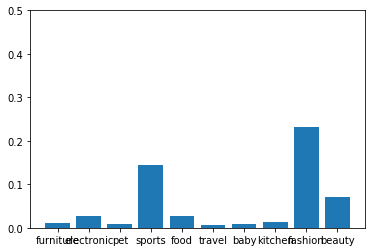

In [139]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = M_20[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
plt.ylim(0, 0.5)
#group0
idx=np.where(M_20_transformed['predict']==0)
clustering = M_20.loc[M_20.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

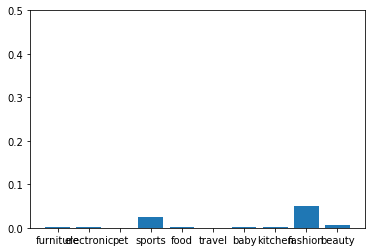

In [141]:
#group1
idx=np.where(M_20_transformed['predict']==1)
clustering = M_20.loc[M_20.index[idx]] 
plt.ylim(0, 0.5)
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

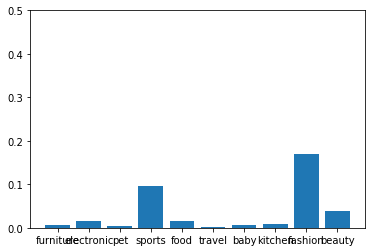

In [142]:
#group2
idx=np.where(M_20_transformed['predict']==2)
clustering = M_20.loc[M_20.index[idx]] 
plt.ylim(0, 0.5)
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

# Scoring

In [144]:
import matplotlib.pyplot as pyplot

In [145]:
#clac0부터 순서대로
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [146]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
        sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_20_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        category_rate[kk] = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [147]:
import random

In [151]:
#random data generate
for ii in range(10) :
    random_idx = M_20_transformed.index[random.randint(0,len(M_20_transformed))]
    random_data = M_20_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.4012201060040067, 0.4444481542203724, 0.27743028700431077]
[0.12957267376514855, 0.7286432986427867, 0.3233435272594773]
[0.2966404025759482, 0.4554949875614359, 0.19736884630939017]
[0.09680517534792454, 0.6417019888478585, 0.23809079583547965]
[0.18575360328962698, 0.7046695599185241, 0.3186850225684097]
[0.09177932863207892, 0.5988992296436993, 0.19728724918099286]
[0.14602048973405543, 0.5369747423699568, 0.14132005011999538]
[0.060862356638947845, 0.6706252401368115, 0.25591921128377076]
[0.1413196884941735, 0.581833504878706, 0.19743704431192804]
[0.553444776186576, 0.16233879027305534, 0.3365229136880663]


In [152]:
for i in range(10) :
    print(labels[i], clustering_index(3, random_data, M_20, M_20_transformed, i))

furniture 0.04625160652977482
electronic 0.10974601213630392
pet 0.034237208021859145
sports 0.7018871311362574
food 0.10673853557486321
travel 0.016829399839317753
baby 0.0387611108440364
kitchen 0.06334544273186206
fashion 1.22523762925534
beauty 0.28361993899864224


In [153]:
M_20.loc[random_idx,'CLAC0_0':'CLAC0_9']

CLAC0_0    0.0
CLAC0_1    0.0
CLAC0_2    0.0
CLAC0_3    1.0
CLAC0_4    0.0
CLAC0_5    0.0
CLAC0_6    0.0
CLAC0_7    0.0
CLAC0_8    4.0
CLAC0_9    0.0
Name: 498642, dtype: float64

# 50대 여성

In [154]:
F_50 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==50)]
F_50.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
50,22.250000,246562.500000,1.0,29.250000,180.250000,50,1,0,1,0.0,...,1,1,0,0.0,0.0,0,0,0.0,1.0,1.0
97,35.600000,61800.000000,1.0,41.600000,1716.200000,50,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,4.0,0.0
112,51.600000,34800.000000,1.0,60.000000,1254.800000,50,1,0,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
157,92.111111,33377.777778,1.0,140.777778,4183.555556,50,1,0,0,0.0,...,0,0,0,0.0,2.0,0,0,0.0,7.0,0.0
250,81.000000,6000.000000,1.0,81.000000,1625.000000,50,1,0,6,0.0,...,0,0,0,0.0,0.0,0,0,0.0,6.0,0.0


In [190]:
#대대분류 삭제
F_50_drop = F_50.drop(F_50.loc[:, F_50.columns.str.startswith('CLAC0')], axis = 1)
F_50_drop.columns
mms = MinMaxScaler()
mms.fit(F_50_drop) #대대분류 뺀 column들만 갖고
F_50_transformed = mms.transform(F_50_drop)

In [186]:
Sum_of_squared_distances = []

for k in range(1,30):
    km = KMeans(n_clusters=k)
    km = km.fit(F_50_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


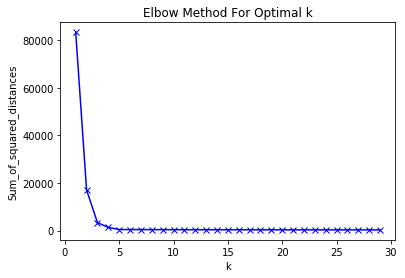

In [187]:
plt.plot(range(1,30), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [191]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_50_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [192]:
F_50_transformed = pd.DataFrame(F_50_transformed)
F_50_transformed.columns = m2.columns[:34]
F_50_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.040909,0.069814,0.0,0.054829,0.012595,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.0,0.005908,0.0,0.002717,0.000000,0.006211,0.000000,0.003484,0.000000
1,0.067879,0.017477,0.0,0.079678,0.121737,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.012500,0.003106,0.000000,0.000000,0.000000
2,0.100202,0.009829,0.0,0.116700,0.088950,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.009317,0.010050,0.000000,0.000000
3,0.182043,0.009426,0.0,0.279231,0.297062,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.015625,0.000000,0.005025,0.010453,0.000000
4,0.159596,0.001671,0.0,0.158954,0.115256,0.0,0.0,0.0,0.015267,0.0,...,0.0,0.0,0.008863,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035928


In [193]:
F_50_transformed['predict'] = km.predict(F_50_transformed)
F_50_transformed['predict'].value_counts()

2    17457
0     9122
1     2295
Name: predict, dtype: int64

In [194]:
F_50_transformed.index = F_50.index
F_50_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
50,0.040909,0.069814,0.0,0.054829,0.012595,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.005908,0.0,0.002717,0.000000,0.006211,0.000000,0.003484,0.000000,2
97,0.067879,0.017477,0.0,0.079678,0.121737,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.012500,0.003106,0.000000,0.000000,0.000000,2
112,0.100202,0.009829,0.0,0.116700,0.088950,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.009317,0.010050,0.000000,0.000000,2
157,0.182043,0.009426,0.0,0.279231,0.297062,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.015625,0.000000,0.005025,0.010453,0.000000,0
250,0.159596,0.001671,0.0,0.158954,0.115256,0.0,0.0,0.0,0.015267,0.0,...,0.0,0.008863,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035928,0


<BarContainer object of 10 artists>

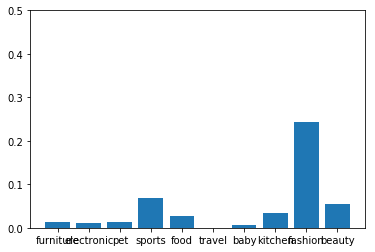

In [195]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = F_50[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
plt.ylim(0, 0.5)
#group0
idx=np.where(F_50_transformed['predict']==0)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

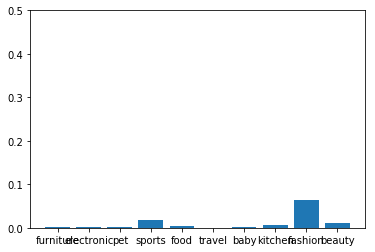

In [196]:
plt.ylim(0, 0.5)
#group1
idx=np.where(F_50_transformed['predict']==1)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

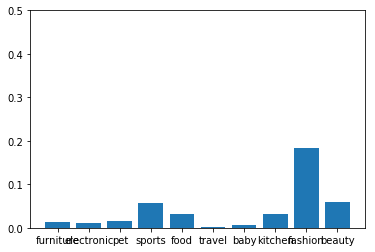

In [197]:
plt.ylim(0, 0.5)
#group2
idx=np.where(F_50_transformed['predict']==2)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [198]:
#clac0부터 순서대로
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
        sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(F_50_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        category_rate[kk] = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [202]:
import random
#random data generate
for ii in range(10) :
    random_idx = F_50_transformed.index[random.randint(0,len(F_50_transformed))]
    random_data = F_50_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.26707319328947116, 0.6270351058257202, 0.08595614162646174]
[0.19042752545718375, 0.5423572860852318, 0.08000158132881116]
[0.47739345540375194, 0.4629651267039663, 0.6019751780284495]
[0.12799697464016294, 0.26023991733624807, 0.33495400724511465]
[0.1302112762816054, 0.4786399857717788, 0.11793839172413034]
[0.28196574187756623, 0.5882288747610712, 0.2194215037861211]
[0.09043337048628201, 0.4179440108526859, 0.1773811052262344]
[0.16458852828935125, 0.5185783247153941, 0.07882170151833032]
[0.17404940289981913, 0.5245733495633057, 0.09677422945127981]
[0.24524093386408805, 0.6050369537480554, 0.04150501211778099]


In [203]:
for i in range(10) :
    print(labels[i], clustering_index(3, random_data, F_50, F_50_transformed, i))

furniture 0.4091096978544825
electronic 0.32121152941405046
pet 0.40975192915913716
sports 1.7026688868369497
food 0.9060885568876015
travel 0.019852638597690136
baby 0.1882120548356843
kitchen 0.9016268691685427
fashion 5.531126456372958
beauty 1.6783771312887517


In [204]:
F_50.loc[random_idx,'CLAC0_0':'CLAC0_9']

CLAC0_0    0.0
CLAC0_1    0.0
CLAC0_2    0.0
CLAC0_3    0.0
CLAC0_4    2.0
CLAC0_5    0.0
CLAC0_6    0.0
CLAC0_7    0.0
CLAC0_8    0.0
CLAC0_9    0.0
Name: 6975, dtype: float64